In [ ]:
""" The experiment to observe the effect of word2vec hyper parameters on
precision, recall and f1 is carried out by executing script try1.py with options:

    python try1.py observe_word2vec_hyperpara min_count
    python try1.py observe_word2vec_hyperpara window

Data collected is stored in the table named 'metrics__chap4_exp3_...'.
This notebook only serves as a convenient way to visualize that data.
"""

In [1]:
import sqlite3
import collections as coll
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
table_name = 'metrics__chap4_exp3_word2vec_hyper__N_20__iter_30__da_1M'

In [3]:
cx = sqlite3.connect('my_metrics.db')
cur = cx.cursor()

In [4]:
cur.execute('select * from %s' % table_name)
data = cur.fetchall()

for x in data:
    row_id, s, mc, w, precision, recall, f1, time = x
    #print '%20s\t%15.9g\t%15.9g\t%15.9g' % (variant, precision, recall, f1)
    #print

In [10]:
# obsolete

row_id, s, mc, w, prec, reca, f1, time = 'row_id', 's', 'mc', 'w', 'prec', 'reca', 'f1', 'time'
columns = [row_id, s, mc, w, prec, reca, f1, time]
i_d = dict(zip(*[columns, range(len(columns))]))

In [12]:
# obsolete

i_d

{'f1': 6,
 'mc': 2,
 'prec': 4,
 'reca': 5,
 'row_id': 0,
 's': 1,
 'time': 7,
 'w': 3}

In [13]:
# obsolete

def gi(k): # get index
    global i_d
    return id_d[k]

In [9]:

def observe_min_count_or_dict(data):
    min_count_dict = coll.defaultdict(list)
    for x in data:
        row_id, s, mc, w, prec, reca, f1, time = x
        min_count_dict[mc].append((s, f1))

    for mc in min_count_dict:
        min_count_dict[mc].sort(key=lambda x: x[0])

    min_count_avg_dict = coll.defaultdict(list)
    for mc in min_count_dict:
        for k, g in itertools.groupby(min_count_dict[mc], key=lambda x: x[0]):
            #for m in g:
            #    print m
            tmp_f1 = [m[1] for m in g]
            min_count_avg_dict[mc].append((k, sum(tmp_f1) * 1. / len(tmp_f1)))

    print min_count_avg_dict

    # tricky: use first key of min_count_avg_dict as index, fetch the value, 
    # which is a list l, and assign [x[0] for x in l] to indexes.
    indexes = [x[0] for x in min_count_avg_dict[min_count_avg_dict.keys()[0]]]

    values = zip(*[[x[1] for x in min_count_avg_dict[min_count]] for min_count in min_count_avg_dict])
    df = pd.DataFrame(values, index=indexes, columns=min_count_avg_dict.keys())
    df.plot()

    fig = plt.gcf()
    fig.set_size_inches(12, 8, forward=True)
    
    plt.show()


defaultdict(<type 'list'>, {1: [(100, 0.08415904602847336), (120, 0.08464348469434942), (140, 0.08461111624895959), (160, 0.08448953057594073), (180, 0.08454363068877933), (200, 0.08446377843780753)], 3: [(100, 0.08605110406319191), (120, 0.0863002594915706), (140, 0.08628393926700431), (160, 0.08629808346162844), (180, 0.08606960031770036), (200, 0.08597603103018699)], 5: [(100, 0.08613379320099443), (120, 0.08636554038983577), (140, 0.08608700855723775), (160, 0.0859901752248111), (180, 0.08634704413532729), (200, 0.08636010031498034)]})


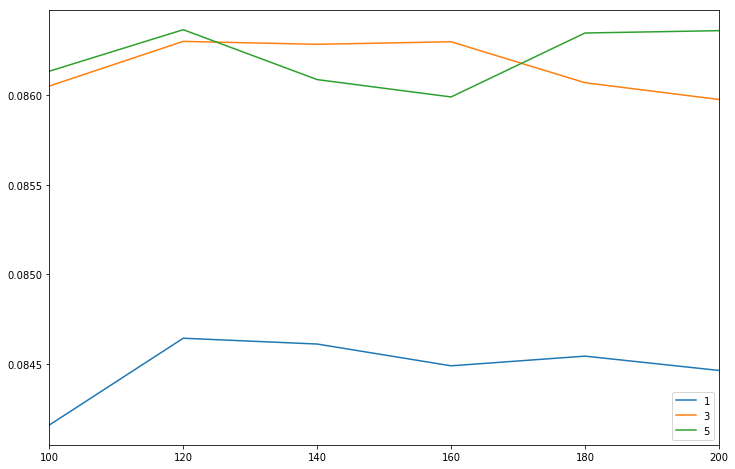

In [10]:
observe_min_count_or_dict(data)

defaultdict(<type 'list'>, {1: [(100, 0.08609707269572028), (120, 0.08659701557493432), (140, 0.08647243786074499), (160, 0.08640470892879487), (180, 0.08636962044597733), (200, 0.08630497422311197)], 3: [(100, 0.08311999173108622), (120, 0.08316242431495856), (140, 0.08319506476409115), (160, 0.08313522394068143), (180, 0.08324402543779003), (200, 0.08330809743053175)], 5: [(100, 0.08131279886411237), (120, 0.08168925204410812), (140, 0.08173059661300938), (160, 0.08149232133434156), (180, 0.0814270404360764), (200, 0.08142824934159983)]})


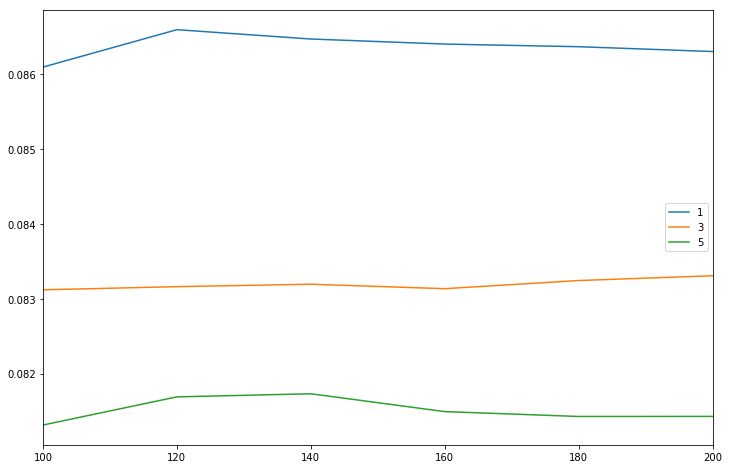

In [11]:
# tricky!
# To reuse code, I reorganize the data: swap the place of mc and w in the original data!

data_for_observation_of_effect_of_window = [    (row_id, s, w, mc, prec, reca, f1, time) 
                                            for (row_id, s, mc, w, prec, reca, f1, time) in data]
observe_min_count_or_dict(data_for_observation_of_effect_of_window)

In [8]:
print len(data)
print len(data_for_observation_of_effect_of_window)

355
355


defaultdict(<type 'list'>, {1: [(100, 0.08422389831478021), (120, 0.08473757326173537), (140, 0.0846716329604574), (160, 0.0845730522100469), (180, 0.08451337623739036), (200, 0.08439902133053351)], 3: [(100, 0.08606561092947305), (120, 0.08627958720711996), (140, 0.0862856317347371), (160, 0.08631464546729942), (180, 0.08605956640185591), (200, 0.08592326230408932)], 5: [(100, 0.08615386103268335), (120, 0.08635816606614284), (140, 0.0861091315283165), (160, 0.08599307659806733), (180, 0.08637614853580383), (200, 0.08637614853580386)]})


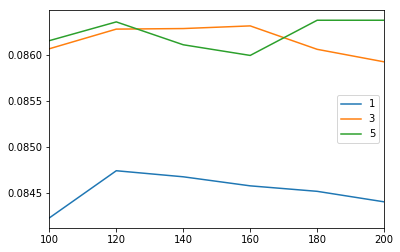

In [32]:
# observe the effect of min_count

min_count_dict = coll.defaultdict(list)
for x in data:
    row_id, s, mc, w, prec, reca, f1, time = x
    min_count_dict[mc].append((s, f1))

for mc in min_count_dict:
    min_count_dict[mc].sort(key=lambda x: x[0])
    
min_count_avg_dict = coll.defaultdict(list)
for mc in min_count_dict:
    for k, g in itertools.groupby(min_count_dict[mc], key=lambda x: x[0]):
        #for m in g:
        #    print m
        tmp_f1 = [m[1] for m in g]
        min_count_avg_dict[mc].append((k, sum(tmp_f1) * 1. / len(tmp_f1)))
        
print min_count_avg_dict

# tricky: use first key of min_count_avg_dict as index, fetch the value, 
# which is a list l, and assign [x[0] for x in l] to indexes.
indexes = [x[0] for x in min_count_avg_dict[min_count_avg_dict.keys()[0]]]

values = zip(*[[x[1] for x in min_count_avg_dict[min_count]] for min_count in min_count_avg_dict])
df = pd.DataFrame(values, index=indexes, columns=min_count_avg_dict.keys())
df.plot()
plt.show()

In [23]:
for k, g in itertools.groupby([('a', 1), ('a', 2), ('b', 3), ('c', 4)], key=lambda x: x[0]):
    print k, g
    for m in g:
        print m

a <itertools._grouper object at 0xaa0d346c>
('a', 1)
('a', 2)
b <itertools._grouper object at 0xaa0d348c>
('b', 3)
c <itertools._grouper object at 0xaa0d346c>
('c', 4)
